In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/court-data/judges_clean/judges_clean.csv
/kaggle/input/court-data/acts_sections/acts_sections.csv
/kaggle/input/court-data/cases/cases/cases_2015.csv
/kaggle/input/court-data/cases/cases/cases_2012.csv
/kaggle/input/court-data/cases/cases/cases_2018.csv
/kaggle/input/court-data/cases/cases/cases_2013.csv
/kaggle/input/court-data/cases/cases/cases_2017.csv
/kaggle/input/court-data/cases/cases/cases_2010.csv
/kaggle/input/court-data/cases/cases/cases_2014.csv
/kaggle/input/court-data/cases/cases/cases_2016.csv
/kaggle/input/court-data/cases/cases/cases_2011.csv
/kaggle/input/court-data/keys/keys/type_name_key.csv
/kaggle/input/court-data/keys/keys/cases_district_key.csv
/kaggle/input/court-data/keys/keys/act_key.csv
/kaggle/input/court-data/keys/keys/disp_name_key.csv
/kaggle/input/court-data/keys/keys/purpose_name_key.csv
/kaggle/input/court-data/keys/keys/cases_state_key.csv
/kaggle/input/court-data/keys/keys/section_key.csv
/kaggle/input/court-data/keys/keys/cases_court_

### *Reading 'judges_clean.csv' into a dataFrame*

In [2]:
judges=pd.read_csv("/kaggle/input/court-data/judges_clean/judges_clean.csv")
judges

,ddl_judge_id,state_code,dist_code,court_no,judge_position,female_judge,start_date,end_date
0,1,1,1,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014
1,2,1,1,1,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014
2,3,1,1,1,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016
3,4,1,1,1,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016
4,5,1,1,1,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018
...,...,...,...,...,...,...,...,...
98473,98474,30,2,9,criminal cases,1 female,21-04-2004,14-11-2013
98474,98475,30,2,9,criminal cases,1 female,16-01-2015,16-01-2016
98475,98476,30,2,9,criminal cases,1 female,09-12-2016,31-07-2017
98476,98477,30,2,10,criminal cases,1 female,15-05-2017,28-01-2019


### *Reading 'cases_court_key.csv' into a dataFrame*

In [3]:
state_dist = pd.read_csv("/kaggle/input/court-data/keys/keys/cases_court_key.csv")
state_dist

,year,state_code,state_name,district_name,dist_code,court_no,court_name
0,2010,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,2010,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,2010,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,2010,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,2010,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
...,...,...,...,...,...,...,...
59423,2018,33,Ladakh,Kargil,1,2,Principal District Judge
59424,2018,33,Ladakh,Kargil,1,3,Chief Judicial Magistrate
59425,2018,33,Ladakh,Leh,2,1,Principal Session Judge
59426,2018,33,Ladakh,Leh,2,2,Principal District Judge


*dropping 'year' column, removing duplicates and sorting* 

In [4]:
state_dist.drop(columns=['year'], inplace=True)
state_dist.drop_duplicates(subset=['state_name', 'district_name', 'court_no'], inplace=True, ignore_index=True)
state_dist = state_dist.sort_values(by=['state_code', 'dist_code', 'court_no'], ascending=(True, True, True), ignore_index=True)
state_dist

,state_code,state_name,district_name,dist_code,court_no,court_name
0,1,Maharashtra,Nandurbar,1,1,Chief Judcial Magistrate Nandurbar
1,1,Maharashtra,Nandurbar,1,2,Civil Court Senior Division Nandurbar
2,1,Maharashtra,Nandurbar,1,3,"DISTRICT AND SESSIONS COURT, NANDURBAR"
3,1,Maharashtra,Nandurbar,1,4,Civil Court J.D. and J.M.F.C.Taloda
4,1,Maharashtra,Nandurbar,1,5,Jt. Civil Court J.D. and J.M.F.C. Shahada
...,...,...,...,...,...,...
6987,33,Ladakh,Kargil,1,2,Principal District Judge
6988,33,Ladakh,Kargil,1,3,Chief Judicial Magistrate
6989,33,Ladakh,Leh,2,1,Principal Session Judge
6990,33,Ladakh,Leh,2,2,Principal District Judge


*merging 'judges' and 'state_dist' dataFrames to create one dataFrame*

In [5]:
judges = pd.merge(judges, state_dist, how='left', on=['state_code', 'dist_code', 'court_no'])
judges.drop(columns=['state_code', 'dist_code', 'court_no'], inplace=True)
judges.drop_duplicates(subset=['ddl_judge_id'], inplace=True)
judges

,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name
0,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
1,2,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
2,3,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
3,4,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
4,5,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
...,...,...,...,...,...,...,...,...
98616,98474,criminal cases,1 female,21-04-2004,14-11-2013,NaN,NaN,NaN
98617,98475,criminal cases,1 female,16-01-2015,16-01-2016,NaN,NaN,NaN
98618,98476,criminal cases,1 female,09-12-2016,31-07-2017,NaN,NaN,NaN
98619,98477,criminal cases,1 female,15-05-2017,28-01-2019,NaN,NaN,NaN


*to get data based on states and districts, remove rows with null values*

In [6]:
#remove rows with unknown state, district
judges.dropna(subset=['state_name', 'district_name'], inplace=True)
judges

,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name
0,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
1,2,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
2,3,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
3,4,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
4,5,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar
...,...,...,...,...,...,...,...,...
98598,98456,district and sessions court,1 female,07-06-2010,27-09-2010,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO"
98599,98457,district and sessions court,1 female,28-09-2010,03-06-2012,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO"
98600,98458,district and sessions court,1 female,04-06-2012,25-02-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO"
98601,98459,district and sessions court,1 female,25-02-2016,30-05-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO"


## *Number of male and female judges state wise*

In [7]:
judge_gender=judges.groupby(['state_name','female_judge']).size().reset_index(drop=False,name='count')
df1=judge_gender[['state_name','female_judge','count']]
df1

,state_name,female_judge,count
0,Andhra Pradesh,-9998 unclear,15
1,Andhra Pradesh,0 nonfemale,2101
2,Andhra Pradesh,1 female,1136
3,Assam,-9998 unclear,24
4,Assam,0 nonfemale,610
...,...,...,...
78,Uttarakhand,0 nonfemale,419
79,Uttarakhand,1 female,302
80,West Bengal,-9998 unclear,17
81,West Bengal,0 nonfemale,1296


## *Number of male and female judges district wise*

In [8]:
judge_gender=judges.groupby(['state_name', 'district_name','female_judge']).size().reset_index(drop=False,name='count')
df2=judge_gender[['state_name', 'district_name', 'female_judge','count']]
df2

,state_name,district_name,female_judge,count
0,Andhra Pradesh,Ananthapur,0 nonfemale,119
1,Andhra Pradesh,Ananthapur,1 female,59
2,Andhra Pradesh,Chittoor,0 nonfemale,150
3,Andhra Pradesh,Chittoor,1 female,52
4,Andhra Pradesh,East Godavari,-9998 unclear,3
...,...,...,...,...
1257,West Bengal,Purulia,1 female,8
1258,West Bengal,South Dinajpur,0 nonfemale,20
1259,West Bengal,South Dinajpur,1 female,14
1260,West Bengal,South Twenty Four Parganas,0 nonfemale,181


## *Number of male and female judges court wise*

In [9]:
judge_gender=judges.groupby(['state_name', 'district_name', 'court_name','female_judge']).size().reset_index(drop=False,name='count')
df3=judge_gender[['state_name', 'district_name', 'court_name','female_judge','count']]
df3

,state_name,district_name,court_name,female_judge,count
0,Andhra Pradesh,Ananthapur,"District Court Complex, Ananthapuramu.",0 nonfemale,81
1,Andhra Pradesh,Ananthapur,"District Court Complex, Ananthapuramu.",1 female,34
2,Andhra Pradesh,Ananthapur,"Family Court, Anantapuramu",0 nonfemale,17
3,Andhra Pradesh,Ananthapur,"Family Court, Anantapuramu",1 female,18
4,Andhra Pradesh,Ananthapur,"JUNIOR CIVIL JUDGE COURT,TADIPATRI",0 nonfemale,8
...,...,...,...,...,...
7117,West Bengal,South Twenty Four Parganas,Civil Judge Senior Division Establishment,1 female,6
7118,West Bengal,South Twenty Four Parganas,District and Sessions Judge Alipur,0 nonfemale,17
7119,West Bengal,South Twenty Four Parganas,District and Sessions Judge Alipur,1 female,2
7120,West Bengal,South Twenty Four Parganas,Sealdah Railway Magistrate Court,0 nonfemale,17


### *Creating different dataFrames based on the gender of judges*

In [10]:
# separate femals and males
female_judges = judges[judges['female_judge']=='1 female']
male_judges = judges[judges['female_judge']=='0 nonfemale']

### *Working Female Judges*

In [11]:
active_female_judges = female_judges[female_judges['end_date'].isna()]
active_female_judges['status'] = 'Active female judge'
active_female_judges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,status
5,6,chief judicial magistrate,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active female judge
62,63,civil judge senior division,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court Senior Division Nandurbar,Active female judge
94,95,chief judicial magistrate,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court J.D. and J.M.F.C.Taloda,Active female judge
122,123,civil judge senior division,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court S.D. Shahada,Active female judge
170,171,chief judicial magistrate,1 female,04-06-2018,NaN,Maharashtra,Dhule,"DISTRICT AND SESSIONS COURT, DHULE",Active female judge
...,...,...,...,...,...,...,...,...,...
98534,98392,criminal cases,1 female,28-01-2019,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURT, SANGUEM",Active female judge
98546,98404,district and sessions court,1 female,23-02-2019,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURT, SANGUEM",Active female judge
98553,98411,criminal cases,1 female,03-09-2018,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURT, CANACONA",Active female judge
98567,98425,criminal cases,1 female,15-12-2016,NaN,Goa,South Goa,"2CIVIL AND CRIMINAL COURTS, QUEPEM",Active female judge


### *Retired Female Judges*

In [12]:
inactive_female_judges = female_judges[female_judges['end_date'].isna() == False]
inactive_female_judges['status'] = 'Inactive female judge'
inactive_female_judges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,status
13,14,civil judge junior division,1 female,08-06-2015,03-06-2017,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive female judge
20,21,civil judge junior division,1 female,31-08-2017,28-06-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive female judge
42,43,district and sessions court,1 female,27-10-2016,15-07-2017,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive female judge
84,85,civil judge senior division,1 female,08-06-2016,07-07-2018,Maharashtra,Nandurbar,"DISTRICT AND SESSIONS COURT, NANDURBAR",Inactive female judge
93,94,chief judicial magistrate,1 female,03-10-2016,07-07-2018,Maharashtra,Nandurbar,Civil Court J.D. and J.M.F.C.Taloda,Inactive female judge
...,...,...,...,...,...,...,...,...,...
98595,98453,criminal cases,1 female,17-10-2014,04-04-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive female judge
98598,98456,district and sessions court,1 female,07-06-2010,27-09-2010,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive female judge
98599,98457,district and sessions court,1 female,28-09-2010,03-06-2012,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive female judge
98600,98458,district and sessions court,1 female,04-06-2012,25-02-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive female judge


### *Working Male Judges*

In [13]:
active_male_judges = male_judges[male_judges['end_date'].isna()]
active_male_judges['status'] = 'Active male judge'
active_male_judges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,status
18,19,civil judge junior division,0 nonfemale,05-06-2017,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active male judge
22,23,civil judge junior division,0 nonfemale,01-09-2017,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active male judge
23,24,civil judge junior division,0 nonfemale,04-06-2018,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active male judge
24,25,civil judge junior division,0 nonfemale,28-06-2018,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active male judge
25,26,civil judge junior division,0 nonfemale,09-07-2018,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active male judge
...,...,...,...,...,...,...,...,...,...
98561,98419,district and sessions court,0 nonfemale,02-01-2018,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURT, CANACONA",Active male judge
98571,98429,criminal cases,0 nonfemale,18-01-2019,NaN,Goa,South Goa,"2CIVIL AND CRIMINAL COURTS, QUEPEM",Active male judge
98586,98444,criminal cases,0 nonfemale,03-01-2017,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Active male judge
98587,98445,criminal cases,0 nonfemale,15-02-2018,NaN,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Active male judge


### *Retired Male Judges*

In [14]:
inactive_male_judges = male_judges[male_judges['end_date'].isna() == False]
inactive_male_judges['status'] = 'Inactive male judge'
inactive_male_judges

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,status
0,1,chief judicial magistrate,0 nonfemale,20-09-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive male judge
1,2,chief judicial magistrate,0 nonfemale,31-10-2013,20-02-2014,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive male judge
2,3,chief judicial magistrate,0 nonfemale,21-02-2014,31-05-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive male judge
3,4,chief judicial magistrate,0 nonfemale,01-06-2016,06-06-2016,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive male judge
4,5,chief judicial magistrate,0 nonfemale,06-06-2016,07-07-2018,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Inactive male judge
...,...,...,...,...,...,...,...,...,...
98584,98442,criminal cases,0 nonfemale,15-01-2016,16-01-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
98588,98446,district and sessions court,0 nonfemale,05-06-2006,01-06-2009,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
98591,98449,district and sessions court,0 nonfemale,01-08-2014,14-01-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
98594,98452,criminal cases,0 nonfemale,04-06-2012,31-05-2013,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive male judge


In [15]:
judges1 = active_female_judges.append(inactive_female_judges, ignore_index=True)
judges1 = judges1.append(active_male_judges, ignore_index=True)
judges1 = judges1.append(inactive_male_judges, ignore_index=True)
judges1

,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,status
0,6,chief judicial magistrate,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,Active female judge
1,63,civil judge senior division,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court Senior Division Nandurbar,Active female judge
2,95,chief judicial magistrate,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court J.D. and J.M.F.C.Taloda,Active female judge
3,123,civil judge senior division,1 female,09-07-2018,NaN,Maharashtra,Nandurbar,Civil Court S.D. Shahada,Active female judge
4,171,chief judicial magistrate,1 female,04-06-2018,NaN,Maharashtra,Dhule,"DISTRICT AND SESSIONS COURT, DHULE",Active female judge
...,...,...,...,...,...,...,...,...,...
47288,98442,criminal cases,0 nonfemale,15-01-2016,16-01-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
47289,98446,district and sessions court,0 nonfemale,05-06-2006,01-06-2009,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
47290,98449,district and sessions court,0 nonfemale,01-08-2014,14-01-2016,Goa,South Goa,"CIVIL AND CRIMINAL COURTS,VASCO",Inactive male judge
47291,98452,criminal cases,0 nonfemale,04-06-2012,31-05-2013,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",Inactive male judge


In [16]:
judges2 = pd.pivot_table(judges1, index=['state_name', 'district_name'], columns='status', values='female_judge', aggfunc=['count'])
judges2

count  \
status                                    Active female judge   
state_name     district_name                                    
Andhra Pradesh Ananthapur                                10.0   
               Chittoor                                   9.0   
               East Godavari                             30.0   
               Guntur                                    38.0   
               Kadapa                                    10.0   
...                                                       ...   
West Bengal    Purba Bardhaman                            6.0   
               Purba Medinipur                           17.0   
               Purulia                                    2.0   
               South Dinajpur                             6.0   
               South Twenty Four Parganas                20.0   

                                                             \
status                                    Active male judge   
state_name     district_name                                  
Andhra Pradesh Ananthapur                              19.0   
               Chittoor                                28.0   
               East Godavari                           37.0   
               Guntur                                  38.0   
               Kadapa                                  10.0   
...                                                     ...   
West Bengal    Purba Bardhaman                         13.0   
               Purba Medinipur                         13.0   
               Purulia                                  9.0   
               South Dinajpur                           4.0   
               South Twenty Four Parganas              60.0   

                                                                 \
status                                    Inactive female judge   
state_name     district_name                                      
Andhra Pradesh Ananthapur                                  49.0   
               Chittoor                                    43.0   
               East Godavari                               78.0   
               Guntur                                     145.0   
               Kadapa                                      35.0   
...                                                         ...   
West Bengal    Purba Bardhaman                             20.0   
               Purba Medinipur                             22.0   
               Purulia                                      6.0   
               South Dinajpur                               8.0   
               South Twenty Four Parganas                  40.0   

                                                               
status                                    Inactive male judge  
state_name     district_name                                   
Andhra Pradesh Ananthapur                               100.0  
               Chittoor                                 122.0  
               East Godavari                            215.0  
               Guntur                                   184.0  
               Kadapa                                    85.0  
...                                                       ...  
West Bengal    Purba Bardhaman                           29.0  
               Purba Medinipur                           45.0  
               Purulia                                   20.0  
               South Dinajpur                            16.0  
               South Twenty Four Parganas               121.0  

[584 rows x 4 columns]

In [17]:
#converting to percentage
judges2['count', 'Active female judge'] = (judges2['count', 'Active female judge']/judges2['count', 'Active female judge'].sum())*100

judges2['count', 'Inactive female judge'] = (judges2['count', 'Inactive female judge']/judges2['count', 'Inactive female judge'].sum())*100

judges2['count', 'Active male judge'] = (judges2['count', 'Active male judge']/judges2['count', 'Active male judge'].sum())*100

judges2['count', 'Inactive male judge'] = (judges2['count', 'Inactive male judge']/judges2['count', 'Inactive male judge'].sum())*100

judges2.rename(columns={'count':'percentage %'}, inplace=True)
judges2

percentage %  \
status                                    Active female judge   
state_name     district_name                                    
Andhra Pradesh Ananthapur                            0.358038   
               Chittoor                              0.322234   
               East Godavari                         1.074114   
               Guntur                                1.360544   
               Kadapa                                0.358038   
...                                                       ...   
West Bengal    Purba Bardhaman                       0.214823   
               Purba Medinipur                       0.608665   
               Purulia                               0.071608   
               South Dinajpur                        0.214823   
               South Twenty Four Parganas            0.716076   

                                                             \
status                                    Active male judge   
state_name     district_name                                  
Andhra Pradesh Ananthapur                          0.339710   
               Chittoor                            0.500626   
               East Godavari                       0.661541   
               Guntur                              0.679421   
               Kadapa                              0.178795   
...                                                     ...   
West Bengal    Purba Bardhaman                     0.232433   
               Purba Medinipur                     0.232433   
               Purulia                             0.160915   
               South Dinajpur                      0.071518   
               South Twenty Four Parganas          1.072770   

                                                                 \
status                                    Inactive female judge   
state_name     district_name                                      
Andhra Pradesh Ananthapur                              0.451779   
               Chittoor                                0.396460   
               East Godavari                           0.719159   
               Guntur                                  1.336898   
               Kadapa                                  0.322700   
...                                                         ...   
West Bengal    Purba Bardhaman                         0.184400   
               Purba Medinipur                         0.202840   
               Purulia                                 0.055320   
               South Dinajpur                          0.073760   
               South Twenty Four Parganas              0.368800   

                                                               
status                                    Inactive male judge  
state_name     district_name                                   
Andhra Pradesh Ananthapur                            0.356366  
               Chittoor                              0.434767  
               East Godavari                         0.766188  
               Guntur                                0.655714  
               Kadapa                                0.302912  
...                                                       ...  
West Bengal    Purba Bardhaman                       0.103346  
               Purba Medinipur                       0.160365  
               Purulia                               0.071273  
               South Dinajpur                        0.057019  
               South Twenty Four Parganas            0.431203  

[584 rows x 4 columns]

In [18]:
judges3 = pd.pivot_table(judges1, index=['state_name'], columns='status', values='female_judge', aggfunc='count')

#converting to percentage
judges3['Active female judge'] = (judges3['Active female judge']/judges3['Active female judge'].sum())*100

judges3['Inactive female judge'] = (judges3['Inactive female judge']/judges3['Inactive female judge'].sum())*100

judges3['Active male judge'] = (judges3['Active male judge']/judges3['Active male judge'].sum())*100

judges3['Inactive male judge'] = (judges3['Inactive male judge']/judges3['Inactive male judge'].sum())*100

judges3

status,Active female judge,Active male judge,Inactive female judge,Inactive male judge
state_name,,,,
Andhra Pradesh,7.482993,5.524763,8.546930,6.386087
Assam,3.795202,2.753442,2.848977,1.625031
Bihar,0.214823,2.109780,0.212060,3.071879
Chandigarh,NaN,0.053638,0.009220,0.014255
Chhattisgarh,3.401361,2.574647,0.940439,0.944371
Delhi,0.286430,0.178795,0.036880,0.074837
Goa,0.895095,0.250313,1.115619,0.488222
Gujarat,7.876835,4.648668,12.032086,5.242151
Haryana,2.434658,2.914357,1.926978,1.692741


## *Pie Chart dipicting the state wise percentage of working and retired, male and female judges*

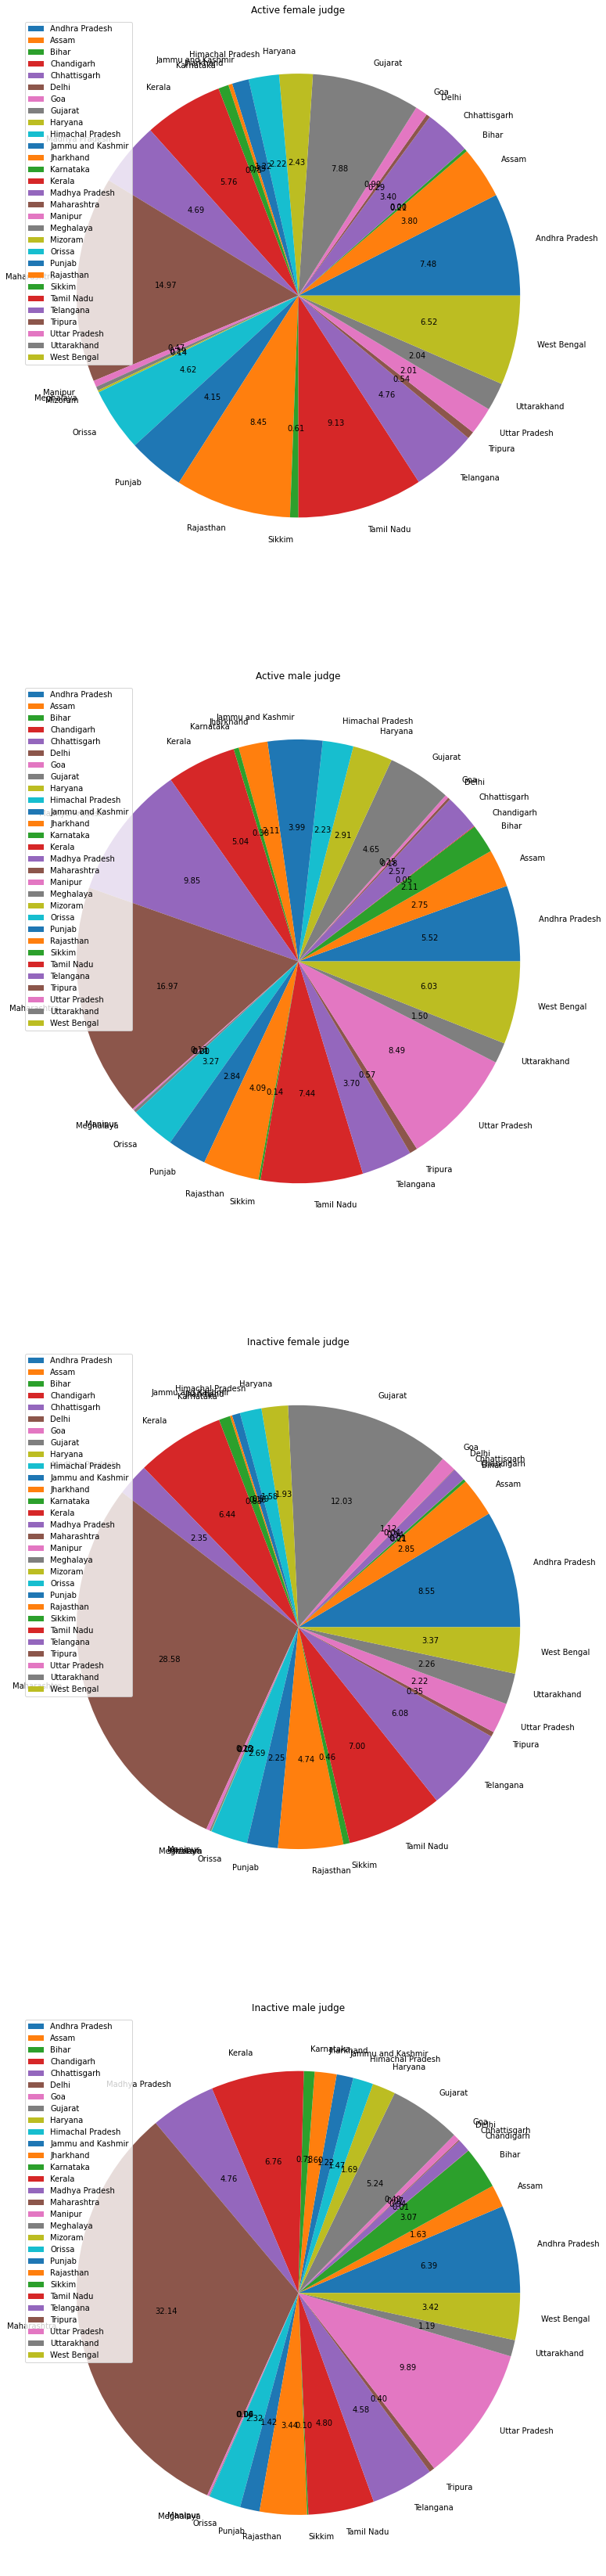

In [19]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 1, figsize=(40,60))

for ax, col in zip(axes, judges3.columns):
    judges3[col].plot(kind='pie', legend=True, ax=ax, autopct='%0.2f', title=col)
    ax.set(ylabel='', title=col, aspect='equal')

plt.savefig("/kaggle/working/working_retired_male_female_judges.jpg")
plt.show()

### *Estimating the number of years of experience for each judge*

In [20]:
judges['start_date'] = pd.to_datetime(judges['start_date'], errors='coerce')
judges['end_date'] = pd.to_datetime(judges['end_date'], errors='coerce')

now = pd.to_datetime('now')

judges['end_date'] = judges['end_date'].fillna(now)
judges['years_of_experience'] = ((judges['end_date'] - judges['start_date']).dt.days)/365
judges

,ddl_judge_id,judge_position,female_judge,start_date,end_date,state_name,district_name,court_name,years_of_experience
0,1,chief judicial magistrate,0 nonfemale,2013-09-20,2014-02-20,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,0.419178
1,2,chief judicial magistrate,0 nonfemale,2013-10-31,2014-02-20,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,0.306849
2,3,chief judicial magistrate,0 nonfemale,2014-02-21,2016-05-31,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,2.273973
3,4,chief judicial magistrate,0 nonfemale,2016-01-06,2016-06-06,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,0.416438
4,5,chief judicial magistrate,0 nonfemale,2016-06-06,2018-07-07,Maharashtra,Nandurbar,Chief Judcial Magistrate Nandurbar,2.084932
...,...,...,...,...,...,...,...,...,...
98598,98456,district and sessions court,1 female,2010-07-06,2010-09-27,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",0.227397
98599,98457,district and sessions court,1 female,2010-09-28,2012-03-06,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",1.438356
98600,98458,district and sessions court,1 female,2012-04-06,2016-02-25,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",3.890411
98601,98459,district and sessions court,1 female,2016-02-25,2016-05-30,Goa,South Goa,"CIVIL AND CRIMINAL COURTS, MARGAO",0.260274


## *Average years of experience of a judge per district*

In [21]:
avg_experience = pd.pivot_table(judges, index=['state_name','judge_position'], values='years_of_experience', aggfunc=['mean'])
avg_experience

mean
                                                         years_of_experience
state_name     judge_position                                               
Andhra Pradesh 1-additional civil judge junior division             2.759589
               1-mm court                                           1.159452
               10-additional district and sessions court            1.299436
               11-additional district and sessions court            2.535029
               13-additional district and sessions court            1.819787
...                                                                      ...
West Bengal    metropolitan magistrate court                        5.715982
               municipal court                                      2.782648
               railway ner                                          4.486301
               small cause court                                    3.185056
               wac                                                  1.646575

[481 rows x 1 columns]

## *Average years of experience of a judge per state*

In [22]:
avg_experience1 = pd.pivot_table(judges, index=['state_name'], values='years_of_experience', aggfunc=['mean'])
avg_experience1

,mean
,years_of_experience
state_name,
Andhra Pradesh,1.822144
Assam,2.300014
Bihar,1.366499
Chandigarh,4.022945
Chhattisgarh,3.375863
Delhi,2.942902
Goa,2.070736
Gujarat,1.381994


## *Bar graph showing the average years of experience of a judge for each state*

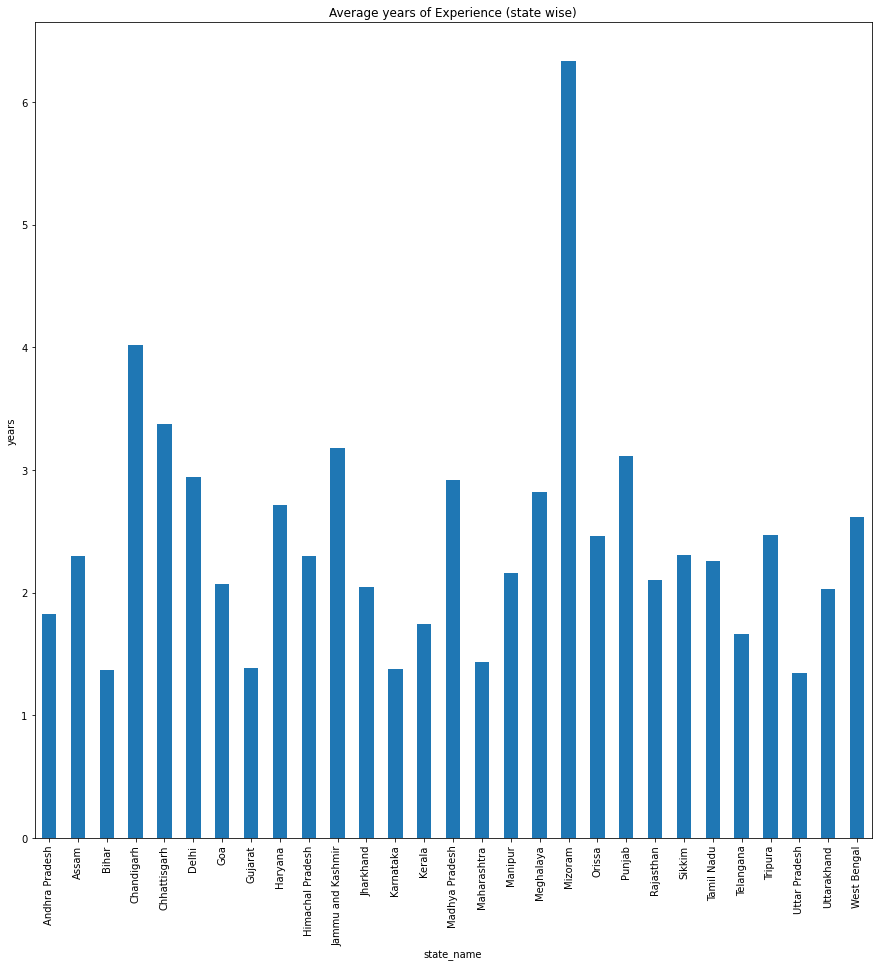

In [23]:
plot = avg_experience1.plot.bar(figsize=(15, 15), title='Average years of Experience (state wise)', ylabel='years', legend=None)
fig = plot.get_figure()
fig.savefig("/kaggle/working/avg_years_exp_state_wise.jpg")